<a href="https://colab.research.google.com/github/5harad/API201-students/blob/main/lectures/lecture-16-code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 16: Difference in means



In [ ]:
library(tidyverse)

theme_set(theme_bw())

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
n1 <- 220

p1_hat <- 50 / 220
p1_hat

[1] 0.2272727

In [ ]:
n2 <- 250

p2_hat <- 20 / 250
p2_hat

[1] 0.08

In [ ]:
p1_hat - p2_hat

[1] 0.1472727

In [ ]:
s <- sqrt(p1_hat * (1-p1_hat) / n1 + p2_hat * (1-p2_hat) / n2)
s

[1] 0.03305559

In [ ]:
lwr <- p1_hat - p2_hat - 2*s
lwr

upr <- p1_hat - p2_hat + 2*s
upr

[1] 0.08116155

[1] 0.2133839

In [ ]:
set.seed(1)

In [ ]:
n1 <- 220
n2 <- 250

p1 <- 0.2
p2 <- 0.1

estimates <- replicate(1e5, mean(rbernoulli(n1, p1)) - mean(rbernoulli(n2, p2)))

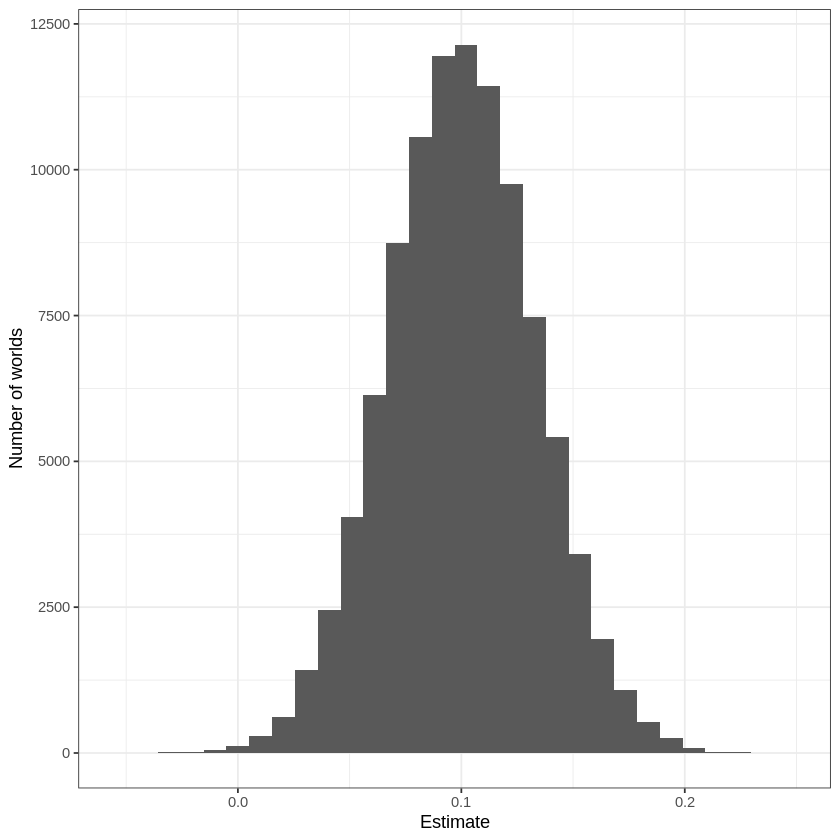

In [ ]:
ggplot(tibble(Estimate = estimates), aes(x = Estimate)) +
  geom_histogram(bins=30) +
  scale_y_continuous('Number of worlds')
ggsave('diff-in-proportions.png', width=4, height=4)

In [ ]:
n1 <- 400
mu1_hat <- 1457
s1 <- 750

n2 <- 625
mu2_hat <- 1420
s2 <- 700

In [ ]:
s <- sqrt(s1^2 / n1 + s2^2/n2)
s

[1] 46.80011

In [ ]:
est <- mu1_hat - mu2_hat
est

[1] 37

In [ ]:
lwr <- est - 2*s
lwr

upr <- est + 2*s
upr

[1] -56.60021

[1] 130.6002